In [1]:
import sys
sys.path.append("..")
from qtn.maxkappa import MaxKappa
from qtn.bimax import BiMax
from qtn.util import (boltzmann, emass, echarge, permittivity, cspeed)
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.io.idl import readsav

/tmp/ipykernel_3902102/2188330759.py:11: DeprecationWarning: Please use `readsav` from the `scipy.io` namespace, the `scipy.io.idl` namespace is deprecated.
  from scipy.io.idl import readsav


In [2]:
pmass = 1.67262178e-27

In [3]:
ant_len = 50      # m (monopole) 
ant_rad = 1.9e-4  # m
base_cap = 20e-12 # Fara
fbins = np.array([4000*2**((2*i+1)/32) for i in range(96)])

### example1: 25-JUN-1995, 06:33:03.488

In [4]:
#vsw = 3.898e5 #m/s
vsw = 397.00870e3
#vp = 46.11e3 #m/s
#tp = pmass * vp**2 / echarge/ 2
#print(tp)
tp = 5.6343741

In [5]:
tc = (11.1439 + 10.8434 * 2)/3
th = (55.4993 + 54.0091*2)/3
t = th/tc
nc = 12.2368
nh = 0.376581
n = nh/nc
ne = nc + nh
k = 7.55723
fpe = np.sqrt(echarge**2 * ne * 1e6 /emass/permittivity)/2/np.pi

In [6]:
tc = 10.96
th = 49.15
t = th/tc
nc = 11.97
nh = 0.46
n = nh/nc
ne = nc + nh
k = 7.35
fpe = np.sqrt(echarge**2 * ne * 1e6 /emass/permittivity)/2/np.pi
print(t)
print(n)
print(ne)
print(fpe)

4.48448905109489
0.03842940685045948
12.430000000000001
31655.35792031372


In [7]:
p = MaxKappa(ant_len, ant_rad, base_cap)

In [8]:
za_zr = np.array([np.array(p.impedance(f, ne, n, t, tp, tc, k, vsw)) for f in fbins])

In [9]:
za = za_zr[:, 0]
zr = za_zr[:, 1]

In [10]:
gain = np.abs((za+zr)/zr)**2

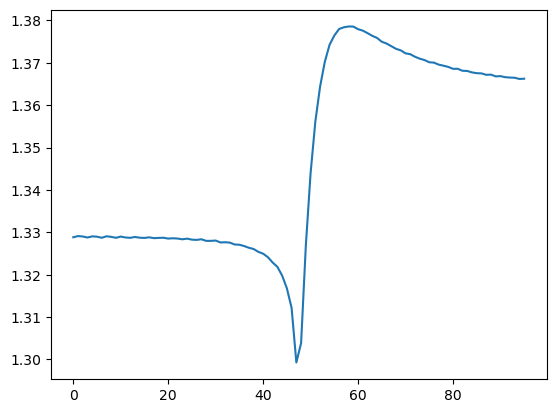

In [11]:
plt.plot(gain)
plt.show()

In [12]:
def helper(f):
    if f < fpe or f > 1.2 * fpe:
        mp.mp.dps = 20
    else:
        mp.mp.dps = 40
    val = p.electron_noise(f, ne, n, t, tp, tc, k, vsw)
    mp.mp.dps= 15
    return val

In [13]:
e_noise = np.array([helper(f) for f in fbins])

In [14]:
p_noise = np.array([p.proton(f, ne, n, t, tp, tc, k, vsw) for f in fbins])

In [15]:
def shot(za, sc_pot):
    _vtc = np.sqrt(2 * echarge * tc/emass)
    _nc = nc * 1e6
    _ne = _nc * _vtc * (1 + n * mp.sqrt(t)) * 2 * np.pi * ant_rad * ant_len / np.sqrt(4 * np.pi)
    A = 1 + echarge * sc_pot/tc
    return 2 * A * echarge**2 * np.abs(za)**2 * _ne 

In [16]:
s_noise = np.array([shot(_za, 0) for _za in za])

In [17]:
m_dat=readsav('/Users/tongyuguang/Google Drive/research/data/meudon_tnr/TNR_XY_ACE_19950625.sav')
m_data=m_dat['data']
mt = m_data['timeur8'][0]
mtag = m_data['time'][0]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tongyuguang/Google Drive/research/data/meudon_tnr/TNR_XY_ACE_19950625.sav'

In [ ]:
mtag[5223]

In [ ]:
spec = m_data['spectra'][0][:, 5223]
spec = 10. ** (spec/10.)

In [ ]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, (e_noise + p_noise + s_noise)/gain, label='theory/3dp fits')
plt.plot(fbins/1000, spec, 'o', markersize=2, label='WIND TNR')
plt.plot(fbins/1000, e_noise/gain,'--', label='electron')
plt.plot(fbins/1000, p_noise/gain, '-.', label='proton')
plt.plot(fbins/1000, s_noise/gain, '--', label='shot')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-18, 1e-10])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('25-JUN-1995, 06:33:03.488')
plt.legend(loc='best')
plt.show()

In [ ]:
fig.savefig('wind1.png', dpi=300)

In [ ]:
np.savez('625_2_data', p_noise=p_noise, e_noise = e_noise, s_noise = s_noise, gain = gain, za = za, zr= zr)

In [ ]:
c=np.load('625_1_data.npz')
c.files

### Example 2: 1995-06-19/18:52:35.344

In [ ]:
vsw = 754.408e3
vsw = 1000e3
#tp = 31.6888
tp = 300
tc = 10.7241
th = 53.5818
t = th/tc
nc = 5.73674
#nh = 0.309319
netnr = 6.058
nh = netnr - nc
n = nh/nc
ne = nc + nh
k = 6.5519
fpe = np.sqrt(echarge**2 * ne * 1e6 /emass/permittivity)/2/np.pi
print(nh)
print(t)
print(n)
print(ne)
print(fpe)

In [ ]:
p = MaxKappa(ant_len, ant_rad, base_cap)

In [ ]:
za_zr = np.array([np.array(p.impedance(f, ne, n, t, tp, tc, k, vsw)) for f in fbins])

In [ ]:
za = za_zr[:, 0]
zr = za_zr[:, 1]

In [ ]:
gain = np.abs((za+zr)/zr)**2

In [ ]:
plt.plot(gain)
plt.show()

In [ ]:
def helper(f):
    if f < fpe or f > 1.2 * fpe:
        mp.mp.dps = 20
    else:
        mp.mp.dps = 40
    val = p.electron_noise(f, ne, n, t, tp, tc, k, vsw)
    mp.mp.dps= 15
    return val

In [ ]:
e_noise = np.array([helper(f) for f in fbins])

In [ ]:
p_noise = np.array([p.proton(f, ne, n, t, tp, tc, k, vsw) for f in fbins])

In [ ]:
p_noise

In [ ]:
def shot(za, sc_pot):
    _vtc = np.sqrt(2 * echarge * tc/emass)
    _nc = nc * 1e6
    _ne = _nc * _vtc * (1 + n * mp.sqrt(t)) * 2 * np.pi * ant_rad * ant_len / np.sqrt(4 * np.pi)
    A = 1 + echarge * sc_pot/tc
    return 2 * A * echarge**2 * np.abs(za)**2 * _ne 

In [ ]:
s_noise = np.array([shot(_za, 0) for _za in za])

In [ ]:
m_dat=readsav('/Users/tongyuguang/Google Drive/research/data/meudon_tnr/TNR_XY_ACE_19950619.sav')
m_data=m_dat['data']
mt = m_data['timeur8'][0]
mtag = m_data['time'][0]

In [ ]:
mtag[15232]

In [ ]:
spec = m_data['spectra'][0][:, 15232]
spec = 10. ** (spec/10.)

In [ ]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, (e_noise + p_noise + s_noise)/gain, label='theory/3dp fits')
plt.plot(fbins/1000, spec, 'o', markersize=2, label='WIND TNR')
plt.plot(fbins/1000, e_noise/gain,'--', label='electron')
plt.plot(fbins/1000, p_noise/gain, '-.', label='proton')
plt.plot(fbins/1000, s_noise/gain, '--', label='shot')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-18, 1e-10])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('19-JUN-1995, 18:50:02.256')
plt.legend(loc='best')
plt.show()

In [ ]:
fig.savefig('wind1.png', dpi=300)